# Determinando idade das estrelas 

* Determição da idade das estrelas baseado em diferentes propriedades físicas
* Dados obtidos no VizieR (https://vizier.u-strasbg.fr/viz-bin/VizieR)

* Importando bibliotecas

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

* Lendo arquivo CSV

In [16]:
dados = pd.read_csv('VizieR.tsv',sep=";")

* Exibindo cinco primeiras linhas

In [17]:
dados.head()

,B-V,Vmag,log.Teff,logL,Age,Mass
0,0.45,7.32,3.808,3.42,2.48e+07,7.67
1,0.45,7.32,3.808,3.42,3.82e+07,6.75
2,0.45,7.32,3.808,3.42,4.59e+07,6.47
3,0.71,7.38,3.767,3.39,2.47e+07,7.69
4,0.71,7.38,3.767,3.39,3.76e+07,6.77


* Exibindo informações das colunas

In [18]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   B-V       9879 non-null   float64
 1   Vmag      9879 non-null   float64
 2   log.Teff  9879 non-null   float64
 3   logL      9879 non-null   float64
 4   Age       9879 non-null   object 
 5   Mass      9670 non-null   float64
dtypes: float64(5), object(1)
memory usage: 463.2+ KB


* Convertendo coluna Age para numérica

In [19]:
dados['Age'] = pd.to_numeric(dados['Age'],errors='coerce')

In [20]:
dados['Age'] = dados['Age'].apply(lambda x: x/1e9)

In [21]:
dados['Age'].min()

-296.0

In [22]:
dados['Age'].max()

1540000.0

In [23]:
dados = dados[(dados['Age']>0) & (dados['Age']<15)]

* Verficando NaNs

In [24]:
dados.isna().sum()

B-V         0
Vmag        0
log.Teff    0
logL        0
Age         0
Mass        0
dtype: int64

* Diagrama HR

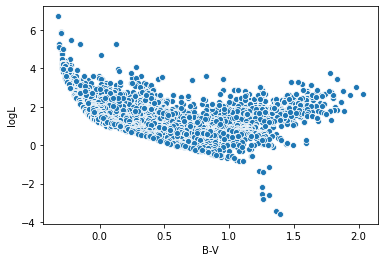

In [25]:
sns.scatterplot(x='B-V',y='logL',data=dados)

* Verificando correlação

In [26]:
corr = dados.corr()

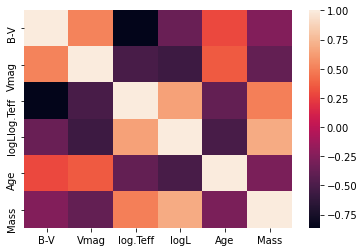

In [27]:
sns.heatmap(corr)

* Verificando distribuição das variáveis

TypeError: distplot() got an unexpected keyword argument 'x'

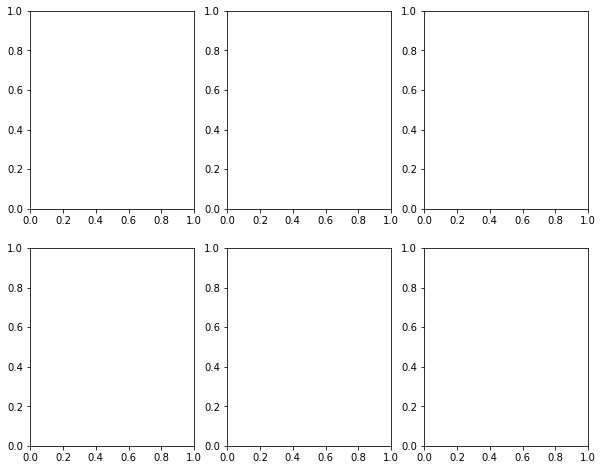

In [28]:
fig, ax = plt.subplots(2,3,figsize=(10,8))
sns.distplot(x=dados['B-V'],ax=ax[0][0])
ax[0][0].set_xlabel('B-V')
sns.distplot(x=dados['Vmag'],ax=ax[0][1])
ax[0][1].set_xlabel('Vmag')
sns.distplot(x=dados['log.Teff'],ax=ax[0][2])
ax[0][2].set_xlabel('log.Teff')

sns.distplot(x=dados['logL'],ax=ax[1][0])
ax[1][0].set_xlabel('logL')
sns.distplot(x=dados['Age'],ax=ax[1][1])
ax[1][1].set_xlabel('Age (Banos)')
sns.distplot(x=dados['Mass'],ax=ax[1][2])
ax[1][2].set_xlabel('Mass')
plt.tight_layout()
plt.show()

* Verificando outliers

In [ ]:
fig, ax = plt.subplots(2,3,figsize=(10,8))
sns.boxplot(y='B-V',data=dados,ax=ax[0][0])
sns.boxplot(y='Vmag',data=dados,ax=ax[0][1])
sns.boxplot(y='log.Teff',data=dados,ax=ax[0][2])
sns.boxplot(y='logL',data=dados,ax=ax[1][0])
sns.boxplot(y='Age',data=dados,ax=ax[1][1])
sns.boxplot(y='Mass',data=dados,ax=ax[1][2])
plt.tight_layout()

* Determinando variáveis X e Y

In [ ]:
X = dados.drop('Age',axis=1).values
Y = dados['Age'].values

* Criando amostras de treino e teste

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_treino,X_teste,Y_treino,Y_teste = train_test_split(X,Y,test_size=0.3,random_state=42)

* Importando métricas de regressão

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
modelo = []
MAE = []
RMSE = []

* Modelo 1: Regressão linear

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
linreg = LinearRegression()

In [ ]:
linreg.fit(X_treino,Y_treino)

In [ ]:
Y_pred_linreg = linreg.predict(X_teste)

In [ ]:
MAE_linreg = mean_absolute_error(Y_teste,Y_pred_linreg)
MSE_linreg = mean_squared_error(Y_teste,Y_pred_linreg)
RMSE_linreg = np.sqrt(MSE_linreg)

In [ ]:
modelo.append("Regressão Linear")
MAE.append(MAE_linreg)
RMSE.append(RMSE_linreg)

In [ ]:
print("MAE = {:0.2f}".format(MAE_linreg))
print("MSE = {:0.2f}".format(MSE_linreg))
print("RMSE = {:0.2f}".format(RMSE_linreg))

* Modelo 2: Árvore de Decisão

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dtr = DecisionTreeRegressor()

In [ ]:
dtr.fit(X_treino,Y_treino)

In [ ]:
Y_pred_dtr = dtr.predict(X_teste)

In [ ]:
MAE_dtr = mean_absolute_error(Y_teste,Y_pred_dtr)
MSE_dtr = mean_squared_error(Y_teste,Y_pred_dtr)
RMSE_dtr = np.sqrt(MSE_dtr)

In [ ]:
modelo.append("Arvore Decisão")
MAE.append(MAE_dtr)
RMSE.append(RMSE_dtr)

In [ ]:
print("MAE = {:0.2f}".format(MAE_dtr))
print("MSE = {:0.2f}".format(MSE_dtr))
print("RMSE = {:0.2f}".format(RMSE_dtr))

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rfr = RandomForestRegressor()

In [ ]:
rfr.fit(X_treino,Y_treino)

In [ ]:
Y_pred_rfr = rfr.predict(X_teste)

In [ ]:
MAE_rfr = mean_absolute_error(Y_teste,Y_pred_rfr)
MSE_rfr = mean_squared_error(Y_teste,Y_pred_rfr)
RMSE_rfr = np.sqrt(MSE_rfr)

In [ ]:
modelo.append("Floresta Aleatoria")
MAE.append(MAE_rfr)
RMSE.append(RMSE_rfr)

In [ ]:
print("MAE = {:0.2f}".format(MAE_rfr))
print("MSE = {:0.2f}".format(MSE_rfr))
print("RMSE = {:0.2f}".format(RMSE_rfr))

In [ ]:
from sklearn.svm import SVR

In [ ]:
svm = SVR()

In [ ]:
svm.fit(X_treino,Y_treino)

In [ ]:
Y_pred_svr = svm.predict(X_teste)

In [ ]:
MAE_svr = mean_absolute_error(Y_teste,Y_pred_svr)
MSE_svr = mean_squared_error(Y_teste,Y_pred_svr)
RMSE_svr = np.sqrt(MSE_svr)

In [ ]:
modelo.append("Support Vector Machine")
MAE.append(MAE_svr)
RMSE.append(RMSE_svr)

In [ ]:
print("MAE = {:0.2f}".format(MAE_svr))
print("MSE = {:0.2f}".format(MSE_svr))
print("RMSE = {:0.2f}".format(RMSE_svr))

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
ada = AdaBoostRegressor()

In [ ]:
ada.fit(X_treino,Y_treino)

In [ ]:
Y_pred_ada = ada.predict(X_teste)

In [ ]:
MAE_ada = mean_absolute_error(Y_teste,Y_pred_ada)
MSE_ada = mean_squared_error(Y_teste,Y_pred_ada)
RMSE_ada = np.sqrt(MSE_ada)

In [ ]:
modelo.append("AdaBoost")
MAE.append(MAE_ada)
RMSE.append(RMSE_ada)

In [ ]:
print("MAE = {:0.2f}".format(MAE_ada))
print("MSE = {:0.2f}".format(MSE_ada))
print("RMSE = {:0.2f}".format(RMSE_ada))

* Determinando melhor modelo

In [ ]:
dicionario = {"Modelo" : modelo, "MAE" : MAE, "RMSE" : RMSE}
dataframe = pd.DataFrame(dicionario)
dataframe = dataframe.sort_values(by='RMSE')

In [ ]:
dataframe

* Floresta aleatória é um bom modelo para determinar idades